# Part II - (Ford GoBike System Data)
## by (Rilwan Shittu)

## Investigation Overview

> The objective of this presentation is to reveal key insights discovered from the investigated dataset:
>1. Men are at least 3 times more than the number of women with about 130,000 and 40,000 respectively. 
>2. Although most rides were were less than 100 minutes, its peak was between 4 to 20 minutes
>3. About 90% of the bike sharing service users are subscribers while only about 10% are non-subscribers.
>4. Subscribers generally used the bikes for an average of about 15 minutes which is 10 minutes less than the average time of non-subscribers at 25 minutes.


## Dataset Overview

> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019. The original dataset included 183,412 rows and 16 columns. However after wrangling the data and engineering some new features, the dataset analysed includes 174,952 rows and 19 columns.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df_clean = df.copy()

In [6]:
# Re-wrangling the data for accurate visualizations
# Drop all rows with missing values
df_clean.dropna(inplace=True)

# Convert start time and end time columns to datetime 
df_clean[['start_time','end_time']] = df_clean[['start_time','end_time']].apply(pd.to_datetime)

# convert the stations and bike id's to object types 
df_clean[['start_station_id','end_station_id','bike_id']] = df_clean[['start_station_id','end_station_id','bike_id']].astype(object)

# Create a column for the duration of rides in minutes from their duration in seconds
df_clean['duration_min'] = round(df_clean['duration_sec'].astype(float) / 60,2)

# Changing the datatype of their year of birth from float to integer
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

# Create a column for the members age from their year of birth
df_clean['member_age'] = 2019 - df_clean['member_birth_year'].astype(int)

# Engineer a feature that reveals the actual distance travelled in km
def get_distance(row, r = 6371): 
    """function to measure the distance between latitudinal and longitudinal degrees"""
    dlon = row[1]['end_station_longitude'] - row[1]['start_station_longitude']
    dlat = row[1]['end_station_latitude'] - row[1]['start_station_latitude']
    a = ((math.sin(dlat/2))**2 + math.cos(row[1]['start_station_latitude']) * math.cos(row[1]['end_station_latitude']) * (math.sin(dlon/2))**2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return r * c

df_clean['dist_bet_stations'] = [round(get_distance(row),2) for row in df_clean.iterrows()] 

## (Visualization 1)

> Men are at least 3 times more than the number of women with about 130,000 and 40,000 respectively. 

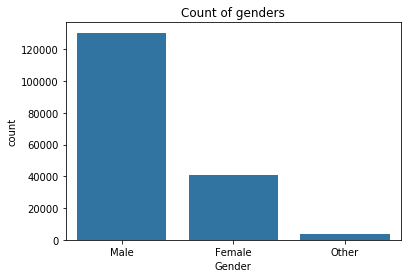

In [7]:
# Visualizing the distribution of genders
color = sb.color_palette()[0]
gender_order = ['Male', 'Female', 'Other']
sb.countplot(data=df_clean, x='member_gender', order=gender_order, color=color)
plt.xlabel('Gender')
plt.title('Count of genders');

## (Visualization 2)

> Although most rides were were less than 100 minutes, its peak was between 4 to 20 minutes.

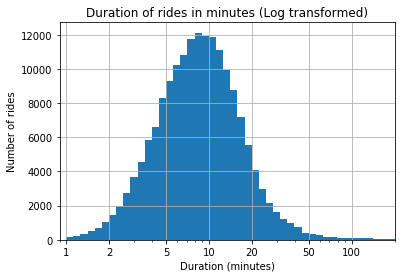

In [8]:
# Visualizing the log transformation of the duration in minutes variable
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log(df_clean['duration_min'].max())+log_binsize, log_binsize)
df_clean.duration_min.hist(bins=bins)
plt.xscale('log')
x_ticks = [1,2,5,10,20,50,100]
plt.xticks(x_ticks, x_ticks)
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of rides')
plt.title('Duration of rides in minutes (Log transformed)')
plt.xlim(0.9,200);

## (Visualization 3)

> About 90% of the users are subscribers while only about 10% are non-subscribers.


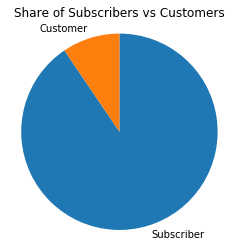

In [9]:
# viewing the proportion of the type of users 
users = df_clean.user_type.value_counts()
plt.pie(x=users, labels=users.index, startangle=90, counterclock = False)
plt.axis('square')
plt.title('Share of Subscribers vs Customers');

## (Visualization 4)

> Subscribers generally used the bikes for an average of about 15 minutes which is 10 minutes less than the average time of non-subscribers at 25 minutes.

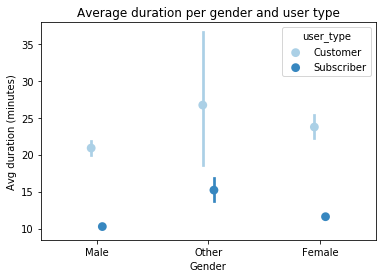

In [10]:
# Visualization
sb.pointplot(data=df_clean, x='member_gender', y='duration_min', hue='user_type', palette='Blues', linestyles='', dodge=0.1)
plt.xlabel('Gender')
plt.ylabel('Avg duration (minutes)')
plt.title('Average duration per gender and user type');